# atomman.defect.Stroh.stress(self, pos)

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2016-03-31

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm)

- - -

## Introduction

The Stroh.stress method computes the position-dependent stress states associated with a particular Stroh defect solution contained in an [atomman.defect.Stroh](atomman.defect.Stroh.ipynb) object. As the Stroh solution is a continuum elasticity solution the supplied positions can but do not have to correspond to atomic positions.

More on the underlying theory can be found in [atomman.defect.Stroh.theory.pdf](atomman.defect.Stroh.theory.pdf).

Arguments:

- __pos__ -- a 3D vector position or a list/array of 3D vector positions.

__Note__: the Stroh stress solution is undefined at xy=(0,0). The positions supplied to the function should be shifted to avoid these values.
        
The underlying code can be found in [atomman/defect/Stroh.py](https://github.com/usnistgov/atomman/blob/master/atomman/defect/Stroh.py).

## Demonstration

Import libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import atomman as am
import atomman.unitconvert as uc

### Solving for an fcc edge dislocation

Let's consider an fcc edge dislocation.
    
    Burgers-vector = a/2[ 1, 0,-1]
    slip plane =        [ 1, 1, 1]
    line-direction =    [ 1,-2, 1]
    
With how the solution is calculated, this means that the system should be oriented relative to the cubic crystal directions:

- x-axis = [ 1, 0,-1]
- y-axis = [ 1, 1, 1]
- z-axis = [ 1,-2, 1]

In [2]:
axes = np.array([[ 1, 0,-1],
                 [ 1, 1, 1],
                 [ 1,-2, 1]])

Lattice and elastic constants should correspond to the potential and temperature of interest and be converted into proper working units. The values below are for 2010--Winey-J-M--Al at 0 K. Proper conversion of units is handled by the [atomman.unitconvert module](atomman.unitconvert.ipynb).

In [3]:
alat = uc.set_in_units(4.0248, 'angstrom')
C11 =  uc.set_in_units(113.76, 'GPa')
C12 =  uc.set_in_units( 61.71, 'GPa')
C44 =  uc.set_in_units( 31.25, 'GPa')

Defining the elastic constants and Burgers vector relative to the cubic cell coordination system

In [4]:
c = am.ElasticConstants(C11=C11, C12=C12, C44=C44)
burgers = alat / 2 * np.array([1., 0., -1.])

Obtaining the proper a Stroh solution requires that the elastic constants matrix and Burgers vector be defined relative to the System of interest's Cartesian orientation. To handle this, you can either:

- Supply the elastic constants and Burgers vector relative to the Cartesian coordination system

- Supply the elastic constants and Burgers vector relative to reference coordination system, and give axes for the transformation.

For cubic systems, the second option allows for the elastic constants, Burgers vector, and axes vectors to be given relative to the cubic cell coordination system (which is what we have above).

In [5]:
#initializing a new Stroh object using the data
stroh = am.defect.Stroh(c, burgers, axes=axes)

### Find the stress state at a point

In [6]:
pos_test = uc.set_in_units(np.array([12.4, 13.5, -10.6]), 'angstrom')

stress = stroh.stress(pos_test)
print "stress ="
print uc.get_in_units(stress, 'GPa'), 'GPa'

stress =
[[-1.52138645 -0.05635917  0.02593688]
 [-0.05635917 -0.06135877  0.02823773]
 [ 0.02593688  0.02823773 -0.55432913]] GPa


### Plotting the stresses of multiple points

2D maps of the Stroh stresses can be created by computing the stress states for multiple points. Points can either be arbitrary for a continuum description, or can be associated with actual atomic positions.

Generate a list of arbitrary positions

In [7]:
X, Y = np.mgrid[-40:40:100j, -40:40:100j]
Z = np.zeros(len(X.ravel()))
positions = np.vstack((X.ravel(), Y.ravel(), Z)).T

Compute the stress states for the positions

In [8]:
stresses = stroh.stress(positions)

Plot setup

In [9]:
x = positions[:,0]
y = positions[:,1]

Plot xx stress component

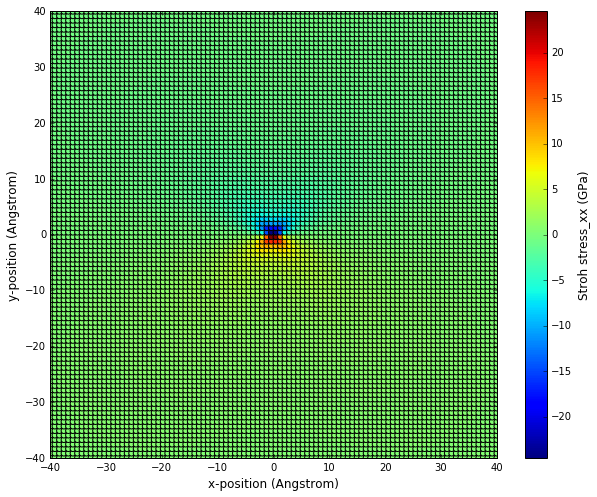

In [10]:
c = uc.get_in_units(stresses[:,0,0], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_xx (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

Plot xy stress component

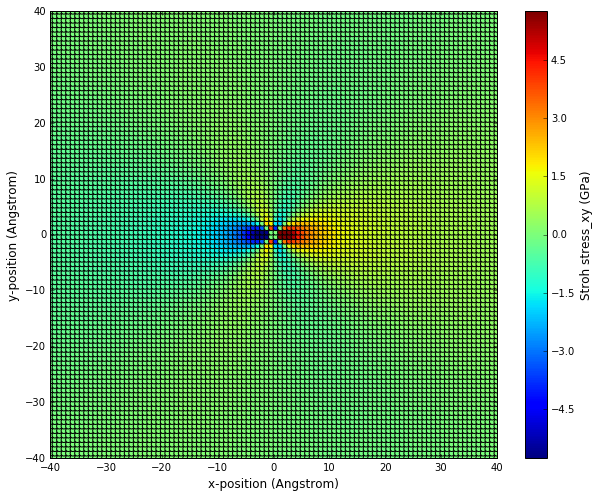

In [11]:
c = uc.get_in_units(stresses[:,0,1], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_xy (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

Plot xz stress component

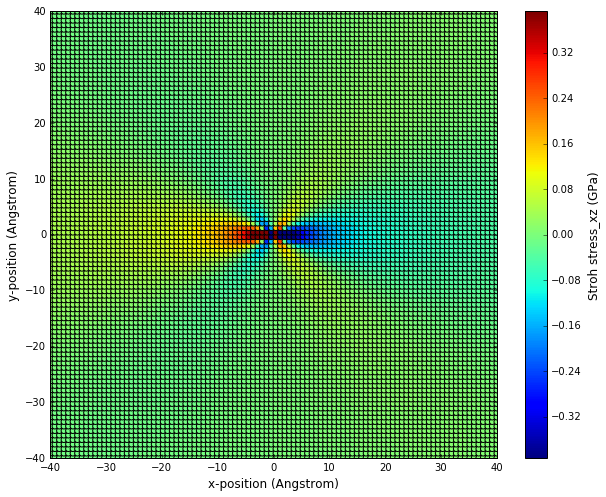

In [12]:
c = uc.get_in_units(stresses[:,0,2], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_xz (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

Plot yy stress component

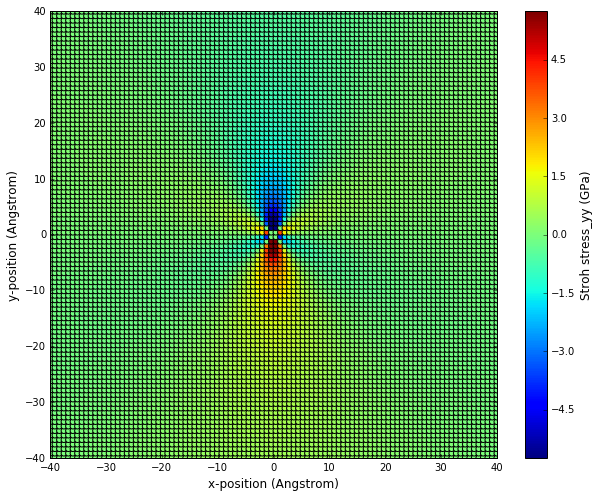

In [13]:
c = uc.get_in_units(stresses[:,1,1], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_yy (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

Plot yz stress component

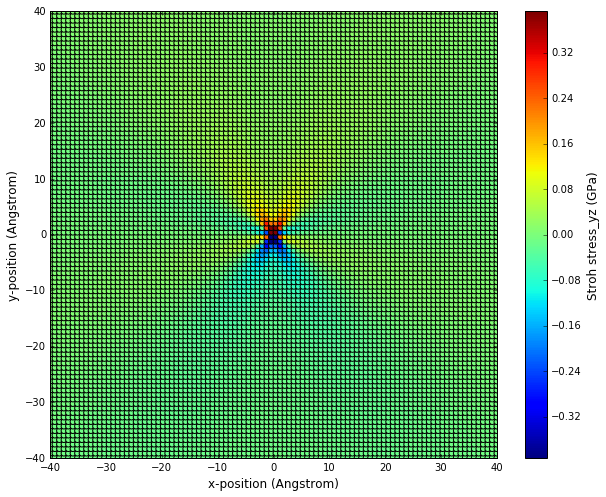

In [14]:
c = uc.get_in_units(stresses[:,1,2], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_yz (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

Plot zz stress component

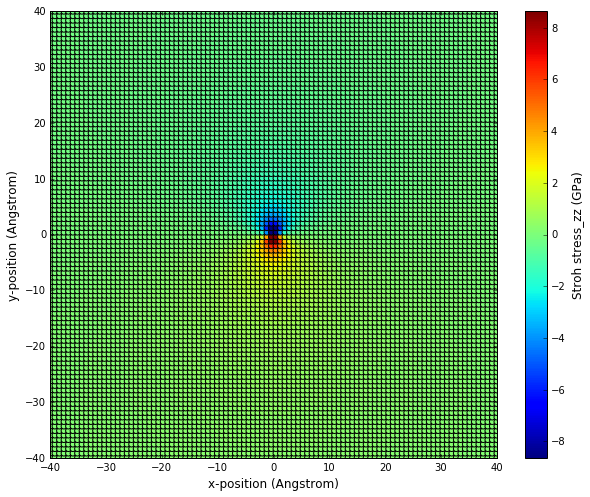

In [15]:
c = uc.get_in_units(stresses[:,2,2], 'GPa')

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(x, y, c=c, vmin=min(c)/2, vmax=max(c)/2, s=30, cmap=cm)
plt.colorbar(sc).set_label('Stroh stress_zz (GPa)', fontsize='large')

plt.xlim(min(x),max(x))
plt.ylim(min(y), max(y))
plt.xlabel('x-position (Angstrom)', fontsize='large')
plt.ylabel('y-position (Angstrom)', fontsize='large')
plt.show()

- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)